In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [31]:
df = pd.read_csv('Loan_Status.csv')


In [32]:
print(df['Loan_Status'].value_counts())


Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [33]:
df['loan_status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})


In [34]:
# Fill numerical columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [35]:
df_encoded = pd.get_dummies(df.drop(columns=['Loan_Status']), drop_first=True)


In [36]:
X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


In [40]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train_res)
y_pred_log = log_model.predict(X_test_scaled)


In [41]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_res, y_train_res)
y_pred_tree = tree_model.predict(X_test)


In [42]:
from sklearn.metrics import classification_report

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))

print("\nDecision Tree Results:")
print(classification_report(y_test, y_pred_tree))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        38
           1       0.86      0.98      0.91        85

    accuracy                           0.87       123
   macro avg       0.89      0.80      0.83       123
weighted avg       0.88      0.87      0.86       123


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66        38
           1       0.84      0.87      0.86        85

    accuracy                           0.80       123
   macro avg       0.76      0.75      0.76       123
weighted avg       0.79      0.80      0.79       123



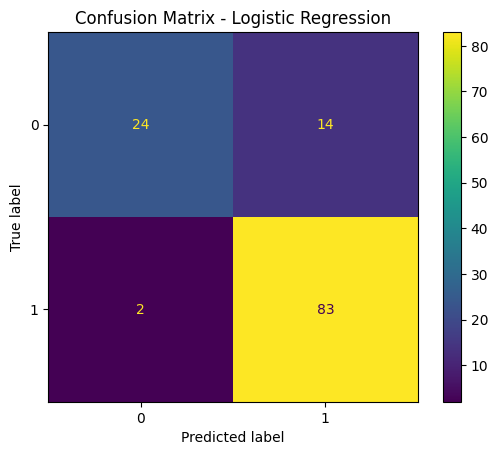

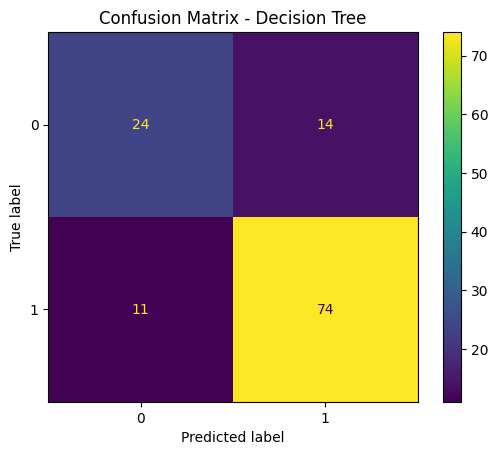

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_model.classes_)
disp_log.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree_model.classes_)
disp_tree.plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()


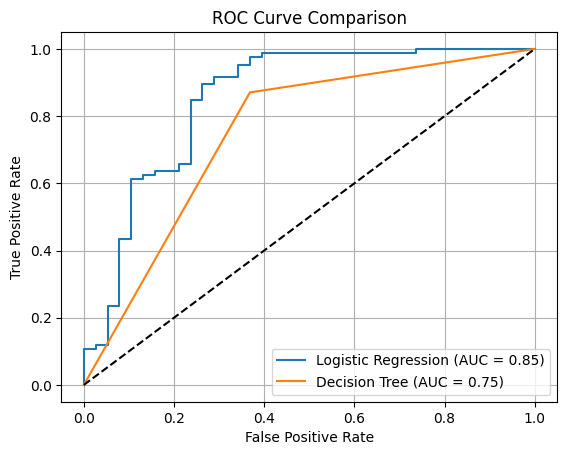

In [44]:
from sklearn.metrics import roc_curve, auc

# Probability predictions
y_proba_log = log_model.predict_proba(X_test_scaled)[:, 1]
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)

roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure()
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


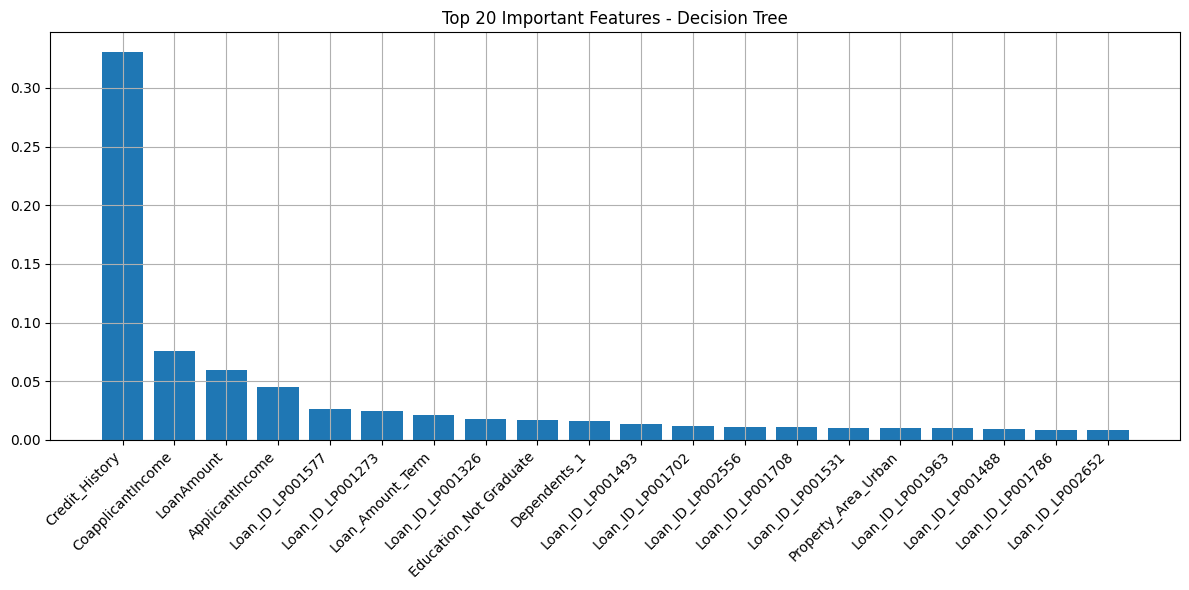

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
importances = tree_model.feature_importances_
feature_names = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

# Plot only top 20 features
top_n = 20
plt.figure(figsize=(12, 6))
plt.title(f"Top {top_n} Important Features - Decision Tree")
plt.bar(range(top_n), sorted_importances[:top_n])
plt.xticks(range(top_n), sorted_features[:top_n], rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.savefig("top_features.png", dpi=300)
plt.show()
